In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import matplotlib.style as mplstyle
# mplstyle.use('ggplot')
%matplotlib inline

# Third attempt

## Read in the data

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


## Convert columns to categories and get codes

In [4]:
obj_cols = ['Sex', 'Ticket', 'Cabin', 'Embarked']

for i in obj_cols:
    df[i] = df[i].astype('category').values.codes

## Get new DataFrame with just numerical cols

In [5]:
for name, group in df.groupby(df.dtypes, axis=1):
    print(name)
    print(group.columns)
    print()

int8
Index(['Sex', 'Embarked'], dtype='object')

int16
Index(['Ticket', 'Cabin'], dtype='object')

int64
Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

float64
Index(['Age', 'Fare'], dtype='object')

object
Index(['Name'], dtype='object')



In [6]:
df1 = pd.DataFrame()

for name, group in df.groupby(df.dtypes, axis=1):
    if name != 'object':
        for i in group.columns:
            df1[i] = df[i].copy()

df1.head(1)

,Sex,Embarked,Ticket,Cabin,PassengerId,Survived,Pclass,SibSp,Parch,Age,Fare
0,1,2,523,-1,1,0,3,1,0,22.0,7.25


## Null values

In [7]:
null_as_means = {i:df1[i].mean() for i in df1.columns}
null_as_means

{'Age': 29.69911764705882,
 'Cabin': 16.62962962962963,
 'Embarked': 1.5297418630751964,
 'Fare': 32.204207968574636,
 'Parch': 0.38159371492704824,
 'PassengerId': 446.0,
 'Pclass': 2.308641975308642,
 'Sex': 0.6475869809203143,
 'SibSp': 0.52300785634118963,
 'Survived': 0.38383838383838381,
 'Ticket': 338.52861952861952}

In [8]:
for i in df1.columns:
    df2 = df1.fillna(value=null_as_means)

In [9]:
df2.head(1)

,Sex,Embarked,Ticket,Cabin,PassengerId,Survived,Pclass,SibSp,Parch,Age,Fare
0,1,2,523,-1,1,0,3,1,0,22.0,7.25


## Scale the data

If doing PCA using `sklearn`, this step may not be needed. The PCA class takes care of centering the data. Note that it may not divide by the variance.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
cols = df2.columns
cols[:2]

Index(['Sex', 'Embarked'], dtype='object')

In [13]:
data = df2.values
scaled = scaler.fit_transform(data)
scaled[:5]

array([[ 0.73769513,  0.58796609,  0.91896631, -0.4624902 , -1.73010796,
        -0.78927234,  0.82737724,  0.43279337, -0.47367361, -0.5924806 ,
        -0.50244517],
       [-1.35557354, -1.91264387,  1.28262456,  1.6886722 , -1.72622007,
         1.2669898 , -1.56610693,  0.43279337, -0.47367361,  0.63878901,
         0.78684529],
       [-1.35557354,  0.58796609,  1.64628282, -0.4624902 , -1.72233219,
         1.2669898 ,  0.82737724, -0.4745452 , -0.47367361, -0.2846632 ,
        -0.48885426],
       [-1.35557354,  0.58796609, -1.44232155,  1.00659632, -1.71844431,
         1.2669898 , -1.56610693,  0.43279337, -0.47367361,  0.40792596,
         0.42073024],
       [ 0.73769513,  0.58796609,  0.66490369, -0.4624902 , -1.71455642,
        -0.78927234,  0.82737724, -0.4745452 , -0.47367361,  0.40792596,
        -0.48633742]])

In [14]:
df3 = pd.DataFrame(scaled, columns=df2.columns)

In [15]:
df3.head(3)

,Sex,Embarked,Ticket,Cabin,PassengerId,Survived,Pclass,SibSp,Parch,Age,Fare
0,0.737695,0.587966,0.918966,-0.462490,-1.730108,-0.789272,0.827377,0.432793,-0.473674,-0.592481,-0.502445
1,-1.355574,-1.912644,1.282625,1.688672,-1.726220,1.266990,-1.566107,0.432793,-0.473674,0.638789,0.786845
2,-1.355574,0.587966,1.646283,-0.462490,-1.722332,1.266990,0.827377,-0.474545,-0.473674,-0.284663,-0.488854


## Scatter matrix time

In [16]:
from pandas.plotting import scatter_matrix

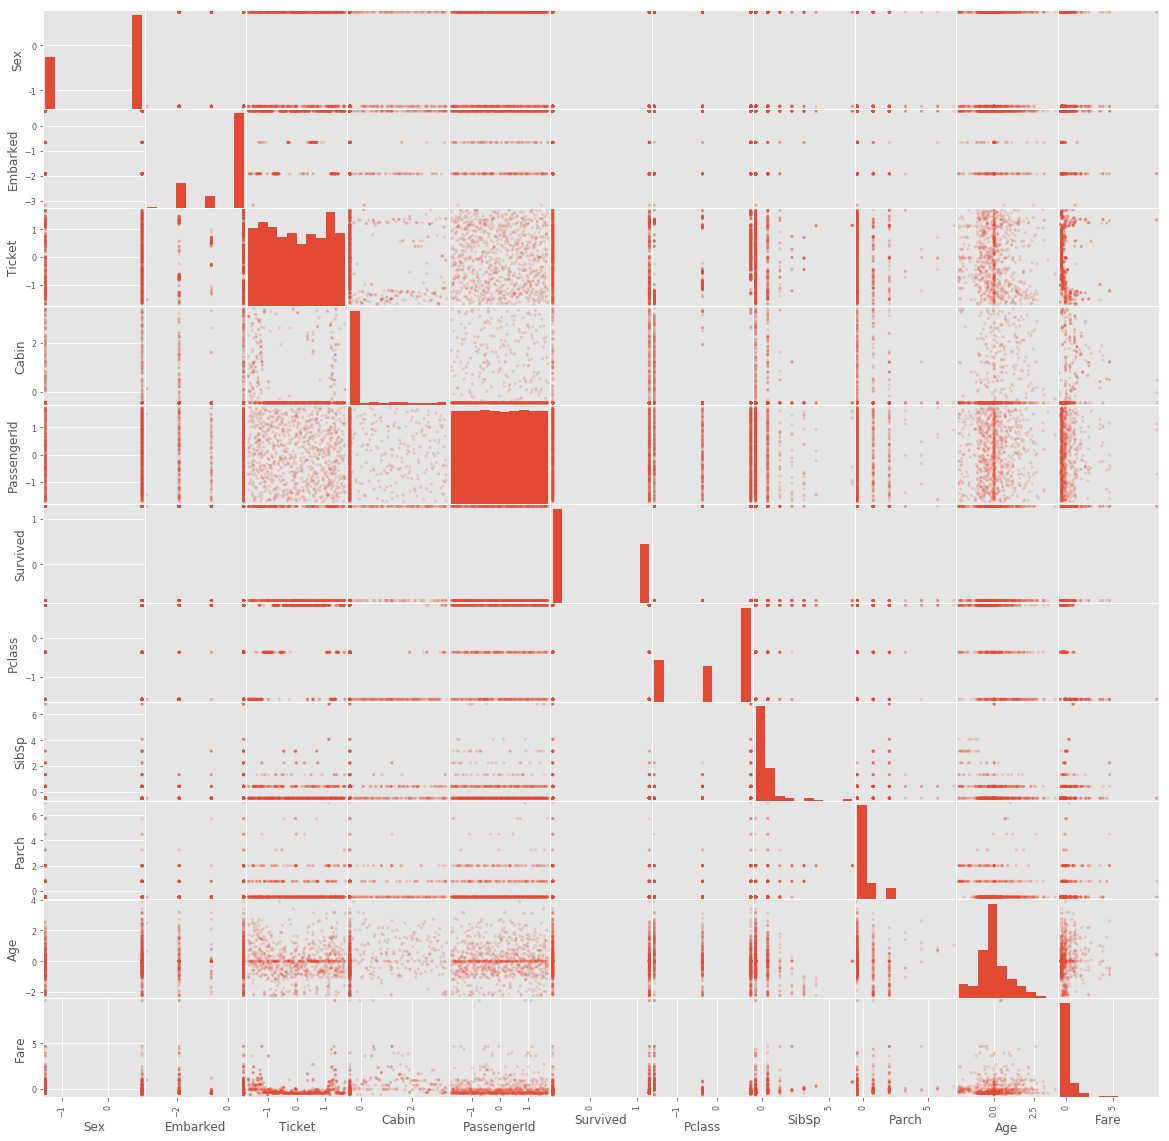

In [17]:
_ = scatter_matrix(df3, figsize=(20,20), alpha=0.2)

## Principal components

In [18]:
from sklearn.decomposition import PCA

In [19]:
n_components = 5

In [20]:
pca = PCA(n_components=n_components)

In [21]:
df4 = pd.DataFrame()
for i in df3.columns:
    if i != 'Survived':
        df4[i] = df3[i]

In [22]:
df4.head(1)

,Sex,Embarked,Ticket,Cabin,PassengerId,Pclass,SibSp,Parch,Age,Fare
0,0.737695,0.587966,0.918966,-0.46249,-1.730108,0.827377,0.432793,-0.473674,-0.592481,-0.502445


In [23]:
X = df4.values

In [24]:
X2D = pca.fit_transform(X)

In [25]:
explained = pca.explained_variance_ratio_
explained

array([ 0.22613425,  0.17611676,  0.10780768,  0.09854461,  0.09654434])

In [26]:
explained.sum()

0.70514763568729388

In [27]:
principal_components = pd.DataFrame(X2D, columns=[i for i in 'ABCDEFGHIJKL'[:n_components]])

In [28]:
principal_components.head(1)

,A,B,C,D,E
0,-1.684229,0.220215,0.806044,-1.50826,0.643883


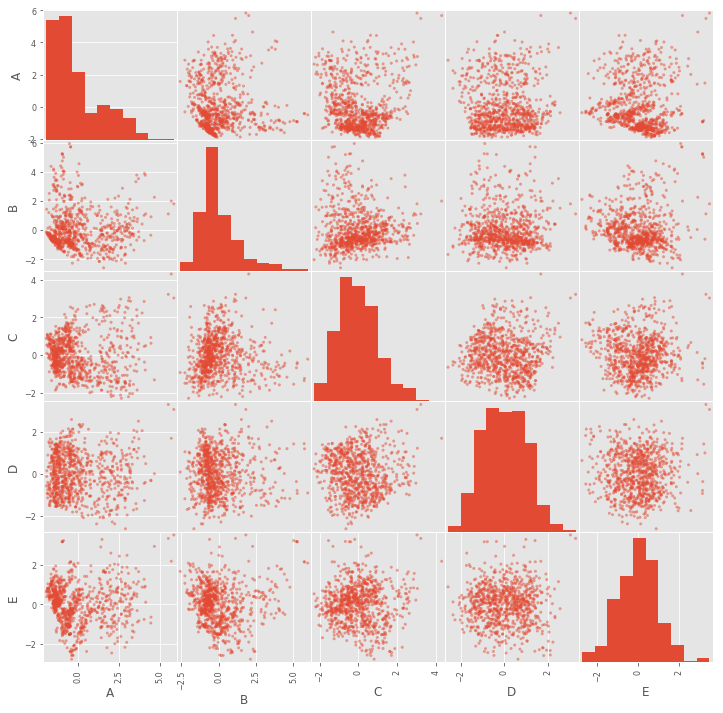

In [29]:
_ = scatter_matrix(principal_components, figsize=(12,12))

In [30]:
principal_components.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
A    891 non-null float64
B    891 non-null float64
C    891 non-null float64
D    891 non-null float64
E    891 non-null float64
dtypes: float64(5)
memory usage: 34.9 KB


## Color scatterplot

With `seaborn`

In [32]:
import seaborn as sns
sns.set(style='ticks')

In [39]:
labeled_pc = principal_components.copy()

In [40]:
labeled_pc['Survived'] = df['Survived'].copy()

In [41]:
labeled_pc.head()

,A,B,C,D,E,Survived
0,-1.684229,0.220215,0.806044,-1.508260,0.643883,0
1,2.524504,0.463200,2.632550,-0.994417,0.155554,1
2,-1.328228,0.397143,1.527198,-1.396527,-0.123468,1
3,2.095124,0.148614,-0.388988,-2.277787,-0.780427,1
4,-1.347785,-0.708128,0.814258,-1.550055,0.658477,0


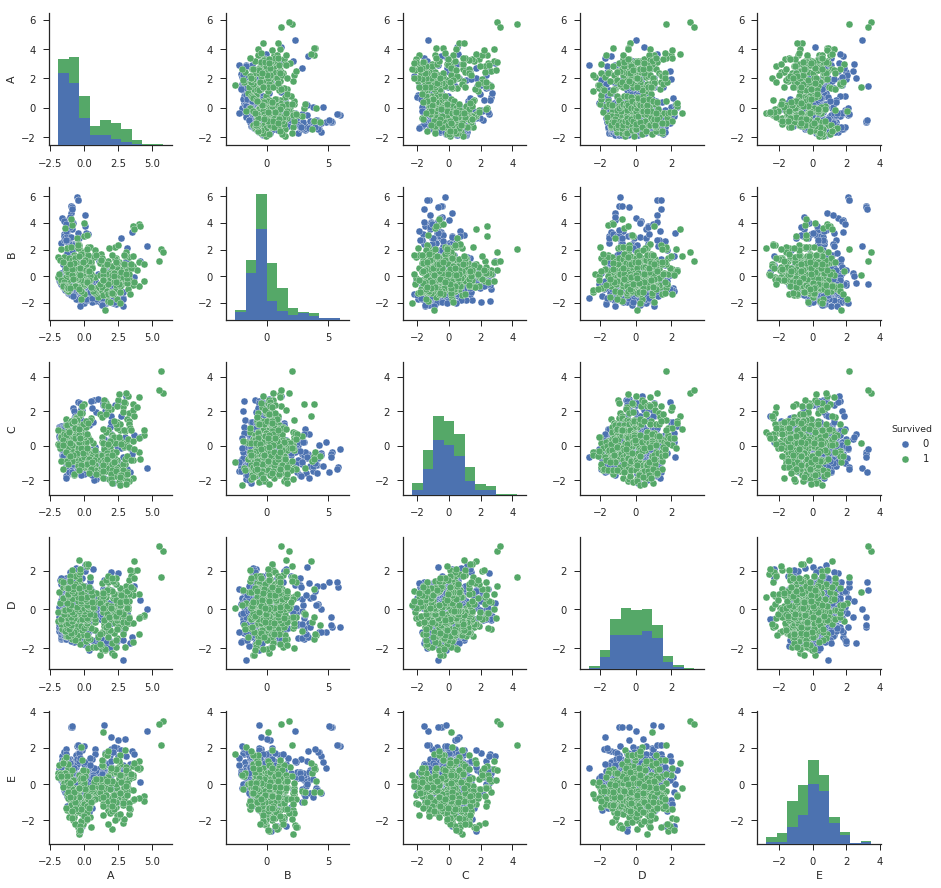

In [65]:
pairs = ['A', 'B', 'C', 'D', 'E']

ax = sns.pairplot(labeled_pc, hue='Survived', x_vars=pairs, y_vars=pairs)